# 課題：引張り試験

<h2>データ整理</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語の表示
%matplotlib inline
data = pd.read_excel('practice.xlsx',header=None)

In [2]:
df1 = data.iloc[0:6,0:5].fillna('-')
df2 = data.iloc[8:,0:4].reset_index(drop=True)
df2.rename(columns={0:"no",1:"weight_kN",2:"stretch_mm",3:"shrink_mm"},inplace=True)

In [3]:
df1.head(10)

,0,1,2,3,4
0,形状,試験前,-,試験後,-
1,-,標点間距離,外径,標点間距離,外径
2,-,mm,mm,mm,mm
3,-,50.05,14,70.3,8.9
4,-,50.2,14,70.7,8.8
5,-,50.15,14,70.4,8.95


In [4]:
df2.head(10) #最初の10つを確認

,no,weight_kN,stretch_mm,shrink_mm
0,No.,荷重,伸び（引張方向）,縮み（垂直方向）
1,－,KN,mm,mm
2,1,2,0,0
3,2,4,0.0043,-0.0012
4,3,5.9,0.0066,-0.0018
5,4,7.9,0.0096,-0.0025
6,5,9.8,0.0133,-0.0035
7,6,11.8,0.0163,-0.0042
8,7,13.8,0.0196,-0.0049
9,8,15.7,0.0226,-0.0058


In [5]:
# 試験片のデータ
shikenhen = df1.iloc[3:,1:].astype(float).reset_index(drop=True)
shikenhen.rename(columns={1:"distance_bef",2:"diameter_bef",3:"distance_aft",4:"diameter_aft"},inplace=True)
shikenhen

,distance_bef,diameter_bef,distance_aft,diameter_aft
0,50.05,14.0,70.3,8.90
1,50.20,14.0,70.7,8.80
2,50.15,14.0,70.4,8.95


In [6]:
# 引張り試験のデータ
hippari = df2[["weight_kN","stretch_mm","shrink_mm"]].fillna(0).iloc[2:].astype(float).reset_index(drop=True)
print(hippari)

    weight_kN  stretch_mm  shrink_mm
0         2.0      0.0000     0.0000
1         4.0      0.0043    -0.0012
2         5.9      0.0066    -0.0018
3         7.9      0.0096    -0.0025
4         9.8      0.0133    -0.0035
5        11.8      0.0163    -0.0042
6        13.8      0.0196    -0.0049
7        15.7      0.0226    -0.0058
8        17.7      0.0256    -0.0065
9        19.6      0.0291    -0.0074
10       21.6      0.0324    -0.0082
11       23.6      0.0351    -0.0090
12       25.5      0.0382    -0.0097
13       27.5      0.0412    -0.0104
14       29.4      0.0447    -0.0112
15       33.4      0.0502    -0.0128
16       37.3      0.0572    -0.0143
17       41.2      0.0647    -0.0158
18       45.1      0.0697    -0.0173
19       43.8      1.5697     0.0000
20       50.0      2.0697     0.0000
21       52.2      2.5697     0.0000
22       54.5      3.0697     0.0000
23       56.5      3.5697     0.0000
24       59.6      4.5697     0.0000
25       62.3      5.5697     0.0000
2

In [7]:
hippari.info()
hippari.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weight_kN   43 non-null     float64
 1   stretch_mm  43 non-null     float64
 2   shrink_mm   43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


,weight_kN,stretch_mm,shrink_mm
count,43.000000,43.000000,43.000000
mean,43.688372,6.308214,-0.003407
std,22.914408,7.548285,0.005093
min,2.000000,0.000000,-0.017300
25%,22.600000,0.033750,-0.006150
50%,52.200000,2.569700,0.000000
75%,65.600000,12.069700,0.000000
max,68.200000,22.569700,0.000000


## 求める材料定数
- ヤング率 E [GPa]
- ポアソン比　ν
- 引張強さ σ_max [MPa]
- 上降伏応力 [MPa]
- 下降伏応力 [MPa]
- 全伸び　δ
- 絞り φ
- 塑性係数 F [MPa]
- 加工硬化指数 n

In [8]:
avg_distance_before = shikenhen["distance_bef"].mean()
print(f'試験前の標点間距離の平均は {avg_distance_before.round(4)} mm')
avg_distance_after = shikenhen["distance_aft"].mean()
print(f'試験後の標点間距離の平均は {avg_distance_after.round(4)} mm')

試験前の標点間距離の平均は 50.1333 mm
試験後の標点間距離の平均は 70.4667 mm


In [9]:
avg_diameter_before = shikenhen["diameter_bef"].mean(axis=0)
print(f'試験前の外径の平均は {avg_diameter_before.round(4)} mm')
area_before = (np.pi*(avg_diameter_before/2)**2).round(4)
print(f'試験前の断面積は {area_before} mm^2')

試験前の外径の平均は 14.0 mm
試験前の断面積は 153.938 mm^2


In [10]:
avg_diameter_after = shikenhen["diameter_aft"].mean(axis=0)
print(f'試験前後外径の平均は {avg_diameter_after.round(4)} mm')
area_after = (np.pi*(avg_diameter_after/2)**2).round(4)
print(f'試験後の断面積は {area_after} mm^2')

試験前後外径の平均は 8.8833 mm
試験後の断面積は 61.9786 mm^2


In [11]:
P_max = hippari["weight_kN"].max().round(2) #最大荷重
print(f'最大荷重は {P_max} kN')

最大荷重は 68.2 kN


In [12]:
sigma_max = P_max*10**3/area_before
print(f'引張強さ σ_max は {sigma_max.round(4)} MPa')

引張強さ σ_max は 443.0355 MPa


In [13]:
zennobi = (avg_distance_after-avg_distance_before)/avg_distance_before
print(f'全伸び δ は {zennobi.round(4)}')

全伸び δ は 0.4056


In [14]:
# 絞り
shibori = (area_before-area_after)/area_before
print(f'絞り φ は {shibori.round(4)}')

絞り φ は 0.5974


In [15]:
# 公称応力、公称ひずみ、対数ひずみ、実応力を計算する
hippari["nominal_stress_MPa"] = (hippari["weight_kN"]*1000/area_before).round(1) #公称応力
hippari["nominal_strain"] = hippari["stretch_mm"]*10**(-6) #公称ひずみ
hippari["log_strain"] = np.log(1+hippari["nominal_strain"]) #対数ひずみ
hippari["true_stress_MPa"] = hippari["nominal_stress_MPa"]*(1+hippari["nominal_strain"]) #実応力

# 一様変形が開始したところから最大荷重点の一つ前までのデータを求める
hippari2 = hippari.copy()
hippari2 = hippari2.iloc[19:33].reset_index(drop=True)
hippari2["shrink_mm"].replace(0, pd.NA,inplace=True)
hippari2.drop(columns=['nominal_stress_MPa','nominal_strain'],inplace=True)

# csvファイルに出力
hippari.drop(columns=["log_strain","true_stress_MPa"],inplace=False).to_csv("hippari.csv",index=False,float_format='%g')
hippari2.to_csv("hippari2.csv",index=False,float_format='%g')

In [16]:
print(hippari)

    weight_kN  stretch_mm  shrink_mm  nominal_stress_MPa  nominal_strain  \
0         2.0      0.0000     0.0000                13.0    0.000000e+00   
1         4.0      0.0043    -0.0012                26.0    4.300000e-09   
2         5.9      0.0066    -0.0018                38.3    6.600000e-09   
3         7.9      0.0096    -0.0025                51.3    9.600000e-09   
4         9.8      0.0133    -0.0035                63.7    1.330000e-08   
5        11.8      0.0163    -0.0042                76.7    1.630000e-08   
6        13.8      0.0196    -0.0049                89.6    1.960000e-08   
7        15.7      0.0226    -0.0058               102.0    2.260000e-08   
8        17.7      0.0256    -0.0065               115.0    2.560000e-08   
9        19.6      0.0291    -0.0074               127.3    2.910000e-08   
10       21.6      0.0324    -0.0082               140.3    3.240000e-08   
11       23.6      0.0351    -0.0090               153.3    3.510000e-08   
12       25.

In [17]:
print(f'最大荷重は {P_max} kN\n')

print(hippari2)

最大荷重は 68.2 kN

    weight_kN  stretch_mm shrink_mm  log_strain  true_stress_MPa
0        43.8      1.5697      <NA>    0.000002       284.500447
1        50.0      2.0697      <NA>    0.000002       324.800672
2        52.2      2.5697      <NA>    0.000003       339.100871
3        54.5      3.0697      <NA>    0.000003       354.001087
4        56.5      3.5697      <NA>    0.000004       367.001310
5        59.6      4.5697      <NA>    0.000005       387.201769
6        62.3      5.5697      <NA>    0.000006       404.702254
7        63.8      6.5697      <NA>    0.000007       414.502723
8        65.3      7.5697      <NA>    0.000008       424.203211
9        66.2      8.5697      <NA>    0.000009       430.003685
10       67.1      9.5697      <NA>    0.000010       435.904171
11       67.7     10.5697      <NA>    0.000011       439.804649
12       68.0     11.5697      <NA>    0.000012       441.705110
13       68.1     12.5697      <NA>    0.000013       442.405561


In [18]:
print(f'上降伏応力 δ_upper は 293.0 MPa')
print(f'下降伏応力 δ_lower は 284.5 MPa')

上降伏応力 δ_upper は 293.0 MPa
下降伏応力 δ_lower は 284.5 MPa


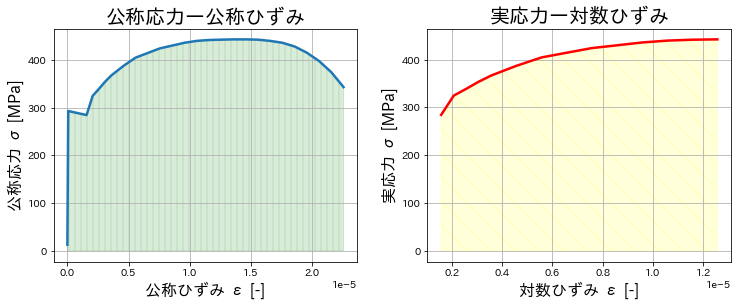

In [19]:
x1=hippari["nominal_strain"] 
y1=hippari["nominal_stress_MPa"] 
x2=hippari2["log_strain"]
y2=hippari2["true_stress_MPa"]
plt.figure(figsize=(12,6))

# plot for engineering stress- engineering strain diagram
plt.subplot(1,2,1)
plt.plot(x1,y1,linewidth=2.5)
plt.fill_between(x1,y1,color='green',hatch='||',alpha=0.15)
plt.title("公称応力ー公称ひずみ",fontsize=20)
plt.xlabel('公称ひずみ ε [-]', fontsize=16)
plt.ylabel('公称応力 σ [MPa]', fontsize=16)
plt.grid()

# plot for true stress- logarithmic strain diagram
plt.tight_layout(pad = 7.0)
plt.subplot(1,2,2)
plt.plot(x2,y2,'red',linewidth=2.5)
plt.fill_between(x2,y2,color='yellow',hatch='\\',alpha=0.15)
plt.title('実応力ー対数ひずみ',fontsize=20)
plt.xlabel('対数ひずみ ε [-]', fontsize=16)
plt.ylabel('実応力 σ [MPa]', fontsize=16)
plt.grid()
plt.savefig("stressstrain_diagram.jpg", dpi=150)
plt.show()

# Compiled codes

In [20]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import japanize_matplotlib  # 日本語の表示

# data = pd.read_excel(r'C:\Users\User\Desktop\practice.xlsx', header=None)
# df1 = data.iloc[0:6, 0:5].fillna('-')
# df2 = data.iloc[8:, 0:4].reset_index(drop=True)
# df2.rename(columns={0: "no", 1: "weight_kN",
#            2: "stretch_mm", 3: "shrink_mm"}, inplace=True)

# # 試験片のデータ
# shikenhen = df1.iloc[3:, 1:].astype(float).reset_index(drop=True)
# shikenhen.rename(columns={1: "distance_bef", 2: "diameter_bef",
#                  3: "distance_aft", 4: "diameter_aft"}, inplace=True)
# # 引張り試験のデータ
# hippari = df2[["weight_kN", "stretch_mm", "shrink_mm"]].fillna(
#     0).iloc[2:].astype(float).reset_index(drop=True)
# # print(hippari)

# avg_distance_before = shikenhen["distance_bef"].mean()
# print(f'試験前の標点間距離の平均は {avg_distance_before.round(4)} mm')
# avg_distance_after = shikenhen["distance_aft"].mean()
# print(f'試験後の標点間距離の平均は {avg_distance_after.round(4)} mm')
# avg_diameter_before = shikenhen["diameter_bef"].mean(axis=0)
# print(f'試験前の外径の平均は {avg_diameter_before.round(4)} mm')
# area_before = (np.pi*(avg_diameter_before/2)**2).round(4)
# print(f'試験前の断面積は {area_before} mm^2')
# avg_diameter_after = shikenhen["diameter_aft"].mean(axis=0)
# print(f'試験前後外径の平均は {avg_diameter_after.round(4)} mm')
# area_after = (np.pi*(avg_diameter_after/2)**2).round(4)
# print(f'試験後の断面積は {area_after} mm^2')
# # 最大荷重
# P_max = hippari["weight_kN"].max().round(2)
# print(f'最大荷重は {P_max} kN')
# # 引張強さ
# sigma_max = P_max*10**3/area_before
# print(f'引張強さ σ_max は {sigma_max.round(4)} MPa')
# # 全伸び
# zennobi = (avg_distance_after-avg_distance_before)/avg_distance_before
# print(f'全伸び δ は {zennobi.round(4)}')
# # 絞り
# shibori = (area_before-area_after)/area_before
# print(f'絞り φ は {shibori.round(4)}\n')

# # 公称応力、公称ひずみ、対数ひずみ、実応力を計算する
# hippari["nominal_stress_MPa"] = (hippari["weight_kN"]*1000/area_before).round(1) #公称応力
# hippari["nominal_strain"] = hippari["stretch_mm"]*10**(-6) #公称ひずみ
# hippari["log_strain"] = np.log(1+hippari["nominal_strain"]) #対数ひずみ
# hippari["true_stress_MPa"] = hippari["nominal_stress_MPa"]*(1+hippari["nominal_strain"]) #実応力

# # 一様変形が開始したところから最大荷重点の一つ前までのデータを求める
# hippari2 = hippari.copy()
# hippari2 = hippari2.iloc[19:33].reset_index(drop=True)
# hippari2["shrink_mm"].replace(0, pd.NA,inplace=True)
# hippari2.drop(columns=['nominal_stress_MPa','nominal_strain'],inplace=True)

# # csvファイルに出力
# hippari.to_csv("hippari.csv",index=False,float_format='%g')
# hippari2.to_csv("hippari2.csv",index=False,float_format='%g')

# # stress-strain diagram
# x1=hippari["nominal_strain"] #  x軸
# y1=hippari["nominal_stress_MPa"] # y軸
# x2=hippari2["log_strain"]
# y2=hippari2["true_stress_MPa"]

# plt.grid(True,alpha=0.3)
# plt.plot(x1,y1,'g',label="公称ひずみー降伏応力")
# plt.plot(x2,y2,'r',label="対数ひずみー実応力")
# plt.title("塑性曲線(公称応力ー公称ひずみ、実応力ー対数ひずみ線図)",fontsize=20,pad=20)
# plt.xlabel('ひずみ ε [-]', fontsize=16)
# plt.ylabel('応力　σ [MPa]', fontsize=16)
# plt.legend()
# plt.show()

# print(f'\n図より上降伏応力 δ_upper は 293.0 MPa')
# print(f'図より下降伏応力 δ_lower は 284.5 MPa')